In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
 
DATADIR = "/content/drive/My Drive/eye_resize(224,224)/"
CATEGORIES = ["central", "hemianopia","normal","quadratopia","superior","turnel"]
 
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) )  # convert to array ,cv2.IMREAD_GRAYSCALE
        #plt.imshow(img_array, cmap='gray')  # graph it
        #plt.show()  # display!
 
        break  # we just want one for now so break
    break 
 
training_data = []
 
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
 
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
 
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array ,cv2.IMREAD_GRAYSCALE
            new_array = cv2.resize(img_array, (32, 32))  # resize to normalize data size
            training_data.append([new_array, class_num])  # add this to our training_data
 
create_training_data()
 
print(len(training_data))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
import time
from sklearn import svm

start = time.time()

X = []
y = []

for features,label in training_data:
  X.append(features)
  y.append(label)
  
X = np.asarray(X,dtype=np.float32)/255.0
n_samples = len(X)
X = X.reshape((n_samples, -1))
#print(X.shape)
#y = keras.utils.to_categorical(y, num_classes=6, dtype='float32')

X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True,test_size=0.20,stratify=y, random_state=42)

clf = svm.SVC(gamma=0.001)
clf.fit(X_train,y_train)
score=cross_val_score(clf, X_train, y_train, cv=5)
print(score)
end = time.time()

print(f"time taken = {end-start}")

from sklearn import metrics
from sklearn.metrics import confusion_matrix

predictions = clf.predict(X_test)
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))
print(metrics.confusion_matrix(y_true=y_test, y_pred=predictions))

[0.7606383  0.73670213 0.76861702 0.74933333 0.712     ]
time taken = 23.582041263580322
0.7914893617021277
[[54  0 11  8  0  7]
 [ 4 60  2  7  8  1]
 [ 4  0 52  2  0  0]
 [ 6  4  3 82  1  0]
 [ 3  0  7  5 68  0]
 [ 0  3  2  7  3 56]]


No handles with labels found to put in legend.


accuracy= 0.7454581560283687


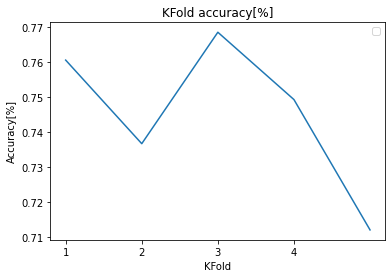

In [ ]:
"""
plt.plot(history.history['loss'], label = "Train") 
plt.plot(history.history['val_loss'], label = "Validation")
plt.title("losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()
plt.plot(history.history['accuracy'], label = "Train")
plt.plot(history.history['val_accuracy'], label = "Validation") 
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy[%]")
plt.legend()
plt.show()
"""
"""
plt.title('Train Accuracy vs Val Accuracy')
#plt.plot(model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
#plt.plot(model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
#plt.plot(model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
#plt.plot(model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
#plt.plot(model_history[2].history['accuracy'], label='Train Accuracy Fold 3', color='green', )
#plt.plot(model_history[2].history['val_accuracy'], label='Val Accuracy Fold 3', color='green', linestyle = "dashdot")
#plt.plot(model_history[3].history['accuracy'], label='Train Accuracy Fold 3', color='orange', )
#plt.plot(model_history[3].history['val_accuracy'], label='Val Accuracy Fold 3', color='orange', linestyle = "dashdot")
plt.plot(model_history[2].history['accuracy'], label='Train Accuracy', color='blue', )
plt.plot(model_history[2].history['val_accuracy'], label='Val Accuracy', color='red', linestyle = "dashdot")
plt.legend()
plt.show()

print('accuracy=',(acc[0]+acc[1]+acc[2]+acc[3]+acc[4])/5)

plt.title('KFold accuracy[%]')
plt.plot([1,2,3,4,5],acc)
#ax=plt.subplot(111)
#ax.set_xlim(1,5)
dim=np.arange(1,5,1)
plt.xlabel("KFold")
plt.ylabel("Accuracy[%]")
plt.xticks(dim)
plt.legend()
plt.show()
"""
print('accuracy=',(score[0]+score[1]+score[2]+score[3]+score[4])/5)

plt.title('KFold accuracy[%]')
plt.plot([1,2,3,4,5],score)
#ax=plt.subplot(111)
#ax.set_xlim(1,5)
dim=np.arange(1,5,1)
plt.xlabel("KFold")
plt.ylabel("Accuracy[%]")
plt.xticks(dim)
plt.legend()
plt.show()

In [ ]:
"""
import glob

dir2 = sorted(glob.glob('/content/drive/My Drive/Sakura program/Sakura Sciences(Nishizaki sensei & Leow senpai)/defect_dataset1/crazing/*'))  

for path in dir2:  
  img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img,(32,32))
  img = np.asarray(img,dtype=np.float32)/255.0 
  #img = img[...,np.newaxis]
  img = np.reshape(img,[1,32,32,1])

  pred =np.argmax(model.predict(img)[0])
  if pred == 0:
    print("The predict image is = crazing")
  elif pred == 1:
    print("The predict image is = inclusion")
  elif pred == 2:
    print("The predict image is = patches")
  elif pred == 3:
    print("The predict image is = pitted surface")
  elif pred == 4:
    print("The predict image is = rolled in scale")
  elif pred == 5:
    print("The predict image is = scratches")
"""

from sklearn.metrics import classification_report
predictions = clf.predict(X_test)
predictions[0]
np.argmax(predictions[0])


pred=[]
for i in range(470):
	predictions[i]
	A=np.argmax(predictions[i])
	pred.append(A)

print(classification_report(pred,y_test,target_names=CATEGORIES))



In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test, y_pred=predictions)

def plot_confusion_matrix(cm, classes,
    normalize=True,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
   # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['central', 'hemianopia','normal','quadratopia','superior','turnel']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#K.utils.plot_model(model,show_shapes=True)
model.summary()